In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn as sn
from astropy.io import ascii
import astropy.constants as c
import astropy.units as u
import exoatlas as ea

In [ ]:
solar_system = ascii.read('SolarSys_data.dat')
candidates = pandas.read_csv('/Users/willwaalkes/Desktop/CU_Boulder/Research/TESS_Followup/Analysis/Data/toi-plus-2020-02-27.csv',comment='#')
params = pandas.read_csv('TESS_Objects.csv',comment='#')
#pop = ascii.read('~/exoatlas-downloads/data/standardized-AllExoplanets.txt')
pop = ea.TransitingExoplanets()

[mergedexoplanetarchivedownloader] Creating a merged exoplanet table from the NASA Exoplanet Archive.
[exoplanetarchivedownloader] Attempting to freshly download data from 
                             http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=*&format=bar-delimited
[exoplanetarchivedownloader] Download successful! Saved file to /Users/willwaalkes/Desktop/CU_Boulder/Research/discovery_project/exoatlas-downloads/data/nea-exoplanets.txt
[exoplanetarchivedownloader] Attempting to freshly download data from 
                             http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars&select=*&format=bar-delimited
[exoplanetarchivedownloader] Download successful! Saved file to /Users/willwaalkes/Desktop/CU_Boulder/Research/discovery_project/exoatlas-downloads/data/nea-compositepars.txt
[mergedexoplanetarchivedownloader] Joining the two Exoplanet Archive tables together.
[mergedexoplanetarchivedow

In [4]:
tic_id = candidates['TIC']
TOI = candidates['Full TOI ID']
Tmag = np.array(candidates['TMag Value'])
Period = np.array(candidates['Orbital Period Value'])
dPeriod = np.array(candidates['Orbital Period Error'])
R_s = np.array(candidates['Star Radius Value'])
dR_s = np.array(candidates['Star Radius Error'])
R_p = np.array(candidates['Planet Radius Value'])
dR_p = np.array(candidates['Planet Radius Error'])
Insolation = np.array(candidates['Effective Stellar Flux Value'])
T_eq = np.array(candidates['Planet Equilibrium Temperature (K) Value'])
T_eff = np.array(candidates['Effective Temperature Value'])
Depth = np.array(candidates['Transit Depth Value'])/1000

In [5]:
tic_id_sample = params['TIC ID']
TOI_sample = params['TOI']
Tmag_sample = np.array(params['Tmag'])
Period_sample = np.array(params['P (days)'] )# must be in days
dPeriod_sample = np.array(params['dP']) # must be in days
R_s_sample = np.array(params['R_s'])
dR_s_sample = np.array(params['dR_s'])
R_p_sample = np.array(params['R_E']) # Earth radii
dR_p_sample = np.array(params['dRe'])
Insolation_sample = np.array(params['Insol'])
T_eq_sample = np.array(params['T_eq'])
T_eff_sample = np.array(params['T_eff'])
Depth_sample = np.array(params['Depth'])/1000 #ppt

have_data = params['Data']
no_data = params['no_data']

In [6]:
Rp_all = pop.radius
#tstar = all_planets['st_teff']
#axis = all_planets['pl_ratdor']
vesc_all = np.sqrt(2*c.G*(pop.mass*c.M_earth)/(Rp_all*c.R_earth))
vtherm_all = np.sqrt(3*(c.k_B*pop.teq*u.K/c.m_p))
vesc_vtherm_all = vesc_all/vtherm_all

S = pop.relative_insolation

In [7]:
ss_names = solar_system['Planet']
ss_vesc = solar_system['Vesc']
ss_vtherm = solar_system['Vtherm']
ss_insol = solar_system['Insolation']
ss_re = solar_system['R_earth']

In [8]:
def TESS_Pop_plots(x, y, x_sample, y_sample,
                   xs_err,ys_err,
                   Title=None,
                   xlabel=None,
                   ylabel=None,
                   vmin=None,
                   vmax=None,
                   xlim=None,
                   ylim=None,
                   whatplot='Insolation',
                   fontcolor_a='blue',
                   fontcolor_b='red',
                   xscale = 'linear',
                   yscale = 'linear',
                   figname='You didnt give me a name.pdf',
                   extras=False):
    
    if ylim == None:
        ylim =[np.nanmin(y),np.nanmax(y)]
    if xlim == None:
        xlim =[np.nanmin(x),np.nanmax(x)]
    
    fig, ax1 = plt.subplots(figsize=(6,6), nrows=1, ncols=1)
    
    if extras == True:
        ax1.scatter(x_sample, y_sample, alpha=0.7, color = 'orange',
                    label='M Dwarf Sample',s=10)

        ax1.errorbar(x_sample[have_data], y_sample[have_data],
                     xerr = xs_err[have_data],
                     yerr = ys_err[have_data],
                     alpha=0.7,color = 'royalblue',
                     label='Have LCO Data',fmt='o',markersize=5,
                     zorder=-1)
        
    if whatplot == 'Insolation':
        
        ax1.scatter(x, y, alpha=0.4, color='#c45508', zorder=-100,
                label='TOIs', s=5, rasterized=True)

        ax1.scatter(S, Rp_all, alpha = 0.6 ,color = 'gray', zorder=-500,
                    label='All Confirmed Planets',s=5, rasterized=True)

        ax1.errorbar(8.3,2.72,xerr=1.0,yerr=0.18,alpha=1.0,
                    zorder=2000,color=fontcolor_a)
        ax1.annotate('TOI 122b', (8.3,2.72*1.1),fontsize=10,zorder=1000,color=fontcolor_a,
                    fontweight='extra bold')
        ax1.errorbar(3.4,1.44,xerr=0.6,yerr=0.12,alpha=1.0,
                    zorder=2000,color=fontcolor_b)
        ax1.annotate('TOI 237b', (3.4,1.44*1.1),fontsize=10,zorder=1000,color=fontcolor_b,
                    fontweight='extra bold')
        
        ax1.axvspan(0.25,1.5,alpha=0.3,color='green',label='Optimistic HZ')
        
        for i in range(len(ss_names)):
        
            ax1.scatter(ss_insol[i],ss_re[i],
                        zorder=10,s=20,color='#0d75f8')        
            if (ss_names[i] == 'Earth') or (ss_names[i] == 'Uranus') or (ss_names[i] == 'Mars'):
                ax1.annotate(ss_names[i], (ss_insol[i], ss_re[i]*1.1),fontsize=10,
                             zorder=1000,color='#0d75f8') 
            else:
                ax1.annotate(ss_names[i], (ss_insol[i], ss_re[i]*0.8),fontsize=10,zorder=1000,
                             color='#0d75f8')
                
    if whatplot == 'Escape':
        
        ax1.scatter(vesc_all/vtherm_all, Rp_all, alpha = 0.5 ,color = 'gray',
                    zorder=-500, label='All Confirmed Planets',s=5)

        ax1.errorbar(6.2,2.72,xerr=1.1,yerr=0.18,color=fontcolor_a,
                     alpha=1.0,zorder=2000)
        ax1.annotate('TOI 122b', ((18748/3585),2.72*1.1),fontsize=10,zorder=1000,color=fontcolor_a,
                     fontweight='extra bold')
        ax1.errorbar(5.5,1.44,xerr=1.6,yerr=0.12,color=fontcolor_b,
                     alpha=1.0,zorder=2000)
        ax1.annotate('TOI 237b', ((15301/3048),1.44*1.1),fontsize=10,zorder=1000,color=fontcolor_b,
                     fontweight='extra bold')

        for i in range(len(ss_names)):

            ax1.scatter(ss_vesc[i]/ss_vtherm[i],ss_re[i],zorder=10,s=20, color='#0d75f8')

            if (ss_names[i] == 'Earth') or (ss_names[i] == 'Uranus'):
                ax1.annotate(ss_names[i], (ss_vesc[i]/ss_vtherm[i], ss_re[i]*1.1),fontsize=10,zorder=1000,
                             color='#0d75f8')

            else:
                ax1.annotate(ss_names[i], (ss_vesc[i]/ss_vtherm[i], ss_re[i]*0.7),fontsize=10,zorder=1000,
                             color='#0d75f8')


    ax1.set_ylabel(ylabel, fontsize=16)
    ax1.set_xlabel(xlabel,fontsize=16)
    ax1.set_title(Title,fontsize=17)
    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.legend(loc='lower right')
    ax1.set_yscale(yscale)
    ax1.set_xscale(xscale)

    plt.tight_layout()
    plt.savefig(figname,dpi=400)
    plt.show()

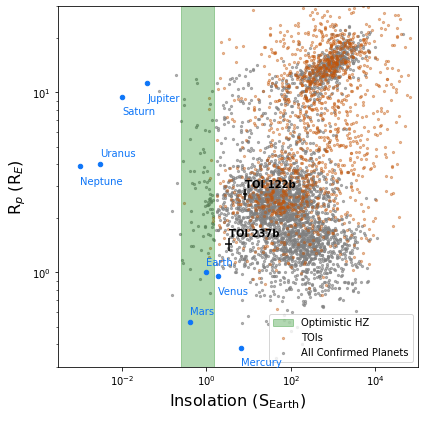

In [144]:
TESS_Pop_plots(y = R_p,
               x = Insolation,
               y_sample = R_p_sample,
               x_sample = Insolation_sample,
               ys_err = dR_p_sample,
               xs_err = 0.3*Insolation_sample,
               #Title = 'M Dwarf Candidates are Small and Cool',
               ylabel = r'R$_p$ (R$_{E}$)',
               xlabel = r'Insolation (S$_{\rm{Earth}}$)',
               whatplot='Insolation',
               fontcolor_a='black',
               fontcolor_b='black',
               xscale = 'log',
               yscale = 'log',
               ylim=[0.3,30],
               xlim = [0.0003, 1e5],
               figname='TOIs_Rp_Insol.pdf')

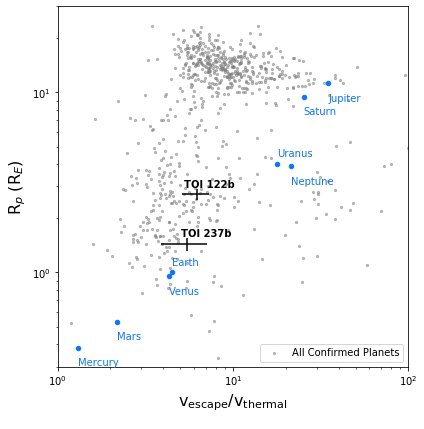

In [142]:
TESS_Pop_plots(y = Rp_all,
               x = vesc_all/vtherm_all,
               y_sample = 0,
               x_sample = 0,
               ys_err = 0,
               xs_err = 0,
               ylabel = r'R$_p$ (R$_{E}$)',
               xlabel = r'v$_{\rm{escape}}$/v$_{\rm{thermal}}$',
               whatplot = 'Escape',
               fontcolor_a='black',
               fontcolor_b='black',
               xscale = 'log',
               yscale = 'log',
               ylim=[0.3,30],
               xlim = [1, 1e2],
               figname='TOIs_vesc_vtherm.pdf')

In [ ]:
# TESS_Pop_plots(x = R_s,
#                y = Tmag,
#                x_sample = R_s_sample,
#                y_sample = Tmag_sample,
#                cbar = T_eff,
#                cbar_sample = T_eff_sample,
#                xs_err = dR_s_sample,
#                ys_err = np.zeros(shape=len(Tmag_sample)),
#                Title = 'M Dwarf Candidates Tend to be Faint',
#                xlabel = r'R$_s$ (R$_{\odot}$)',
#                ylabel = 'Tmag',
#                cbar_label = r'T$_{\rm{eff}}$',
#                vmin = 2400,
#                vmax = 4000,
#                yscale = 'linear',
#                xscale = 'log',
#                #xlim=[0.5,40],
#                cmap="coolwarm_r",
#                figname='TOIs_Rs_Tmag.pdf')

#ax1.axhspan(ylim[0],11,alpha=0.3,color='orange',label='Bright enough for RV')

In [ ]:
# TESS_Pop_plots(y = Tmag,
#                x = Depth,
#                x_sample = Depth_sample,
#                y_sample = Tmag_sample,
#                cbar = R_p,
#                cbar_sample = R_p_sample,
#                xs_err = np.zeros(shape=len(Tmag_sample)),
#                ys_err = np.zeros(shape=len(Tmag_sample)),
#                Title = 'Ground-based Followup Useful for Faint Targets',
#                xlabel = 'Depth (ppt)',
#                ylabel = 'Tmag',
#                cbar_label = r'R$_p$ (R$_{E}$)',
#                vmin = 1,
#                vmax = 10,
#                xscale = 'log',
#                #yscale = 'log',
#                xlim=[0.01,1e3],
#                cmap="plasma",
#                figname='TOIs_depth_tmag.pdf')

#ax1.axvspan(xlim[0],1,alpha=0.3,color='purple',label='Hard to detect this depth)

In [ ]:
# TESS_Pop_plots(y = R_p,
#                x = Period,
#                y_sample = R_p_sample,
#                x_sample = Period_sample,
#                cbar = Tmag,
#                cbar_sample = Tmag_sample,
#                ys_err = dR_p_sample,
#                xs_err = dPeriod_sample,
#                Title = 'Many Large M Dwarf Candidates',
#                ylabel = r'R$_p$ (R$_{E}$)',
#                xlabel = 'Orbital Period (d)',
#                cbar_label = 'Tmag',
#                vmin = 8.5,
#                vmax = 11,
#                xscale = 'log',
#                yscale = 'log',
#                ylim=[0.5,40],
#                cmap="cividis",
#                figname='TOIs_Rp_Per.pdf')

#ax1.axhspan(0,1.25,alpha=0.6,color='pink',label='Rp<1.25R$_{E}$')